### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of pet adoption. You have been provided with a dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Your task is to use this dataset to build and evaluate machine learning models to predict the likelihood of pet adoption based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

In [85]:
import pandas as pd
df = pd.read_csv("pet_adoption_data.csv")
df.head()

,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


###  Data Preparation and Exploration

In [87]:
df.shape

(2007, 13)

In [88]:
# Drop the columns that do not add much value to the analysis
df.columns

Index(['pet_id', 'pet_type', 'breed', 'age_months', 'color', 'size',
       'weight_kg', 'vaccinated', 'health_condition', 'timein_shelter_days',
       'adoption_fee', 'previous_owner', 'adoption_likelihood'],
      dtype='object')

In [89]:
df.drop(['pet_id',"timein_shelter_days"],axis =1, inplace=True)

# Visualization

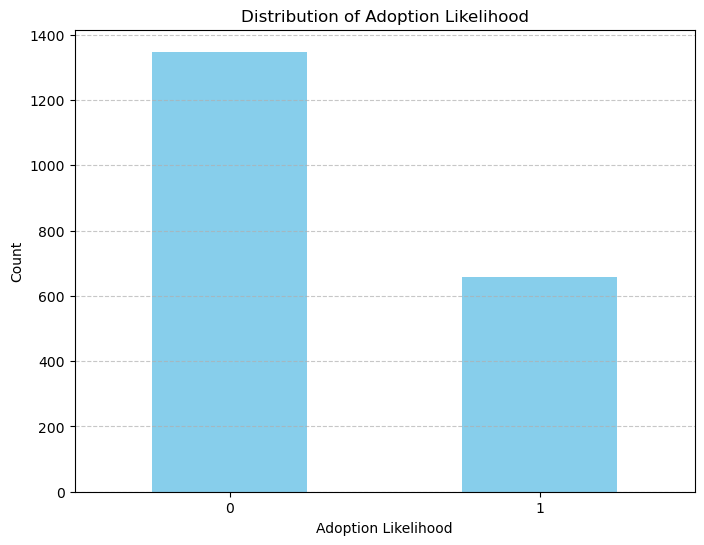

In [91]:
# Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
import matplotlib.pyplot as plt

counts = df['adoption_likelihood'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Adoption Likelihood')
plt.xlabel('Adoption Likelihood')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

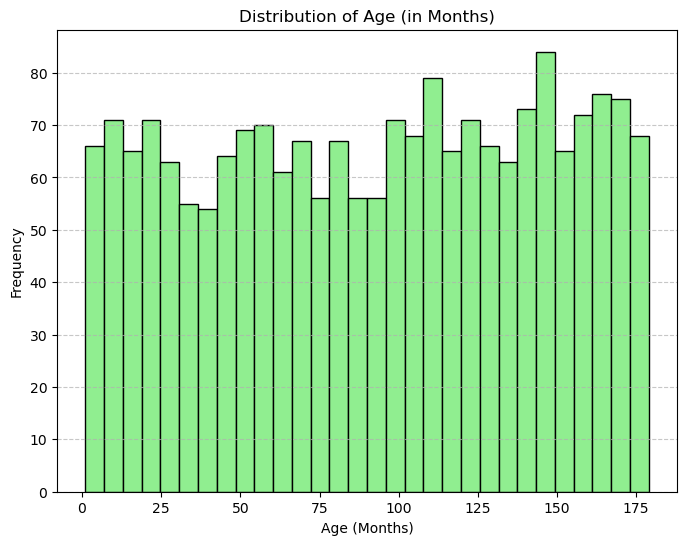

In [92]:
# Visualize the distribution of 'age_months' using a histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['age_months'], bins=30, color='lightgreen', edgecolor='black')

plt.title('Distribution of Age (in Months)')
plt.xlabel('Age (Months)')
plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

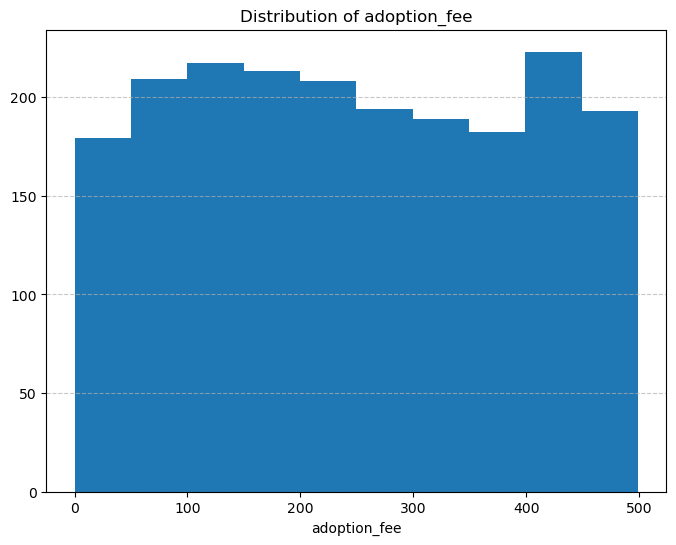

In [93]:
# Visualize the distribution of 'adoption_fee' using a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['adoption_fee'])

plt.title('Distribution of adoption_fee')
plt.xlabel('adoption_fee')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Encoding

## Label Encoding

In [97]:
# Encode the size (Small=1, Medium=2, Large=3).
df['size'] = df['size'].map({'Small': 1, 'Medium': 2, 'Large': 3})
df.head()

,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,adoption_fee,previous_owner,adoption_likelihood
0,Bird,Parakeet,131,Orange,3,5.039768,1,0,140,0,0
1,Rabbit,Rabbit,73,White,3,16.086727,0,0,235,0,0
2,Dog,Golden Retriever,136,Orange,2,2.076286,0,0,385,0,0
3,Bird,Parakeet,97,White,1,3.339423,0,0,217,1,0
4,Rabbit,Rabbit,123,Gray,3,20.498100,0,0,14,1,0


# One-Hot Encoding

In [99]:
# Encode 'color', 'pet_type' and 'breed' using one-hot encoding

df = pd.get_dummies(df, columns=['color', 'pet_type', 'breed'], drop_first=True)

# Scaling

In [132]:
# Scale 'weight_kg' using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Reshape and fit-transform the 'weight_kg' column
df['weight_kg'] = scaler.fit_transform(df[['weight_kg']])

In [134]:
# Scale 'adoption_fee' using StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the 'adoption_fee' column
df['adoption_fee'] = scaler.fit_transform(df[['adoption_fee']])

In [136]:
df.head()

,age_months,size,weight_kg,vaccinated,health_condition,adoption_fee,previous_owner,adoption_likelihood,color_Brown,color_Gray,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,0.138783,1,0,-0.764025,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,0.520009,0,0,-0.098998,0,0,False,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,0.036514,0,0,0.951044,0,0,False,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,0.080105,0,0,-0.225003,1,0,False,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,0.672244,0,0,-1.646060,1,0,False,True,...,False,False,False,True,False,False,False,False,True,False


### Model Training Using Decision Tree

In [139]:
from sklearn.model_selection import train_test_split

X = df.drop("adoption_likelihood", axis = 1)
y = df["adoption_likelihood"]

# Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [141]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [143]:
y_pred = model.predict(X_test)

# Evaluation

In [147]:
# Calculate and print the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8706467661691543


In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       403
           1       0.77      0.86      0.82       200

    accuracy                           0.87       603
   macro avg       0.85      0.87      0.86       603
weighted avg       0.88      0.87      0.87       603



In [154]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[353  50]
 [ 28 172]]


Text(50.722222222222214, 0.5, 'Predicted')

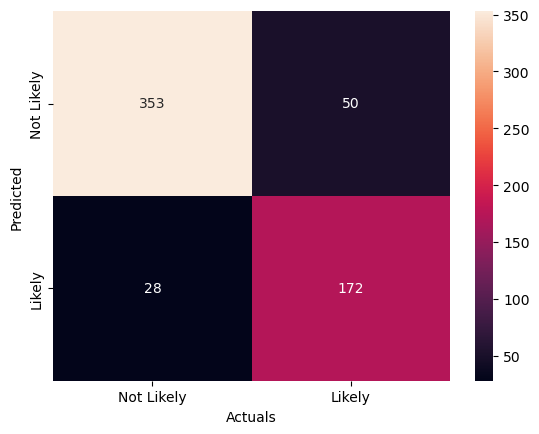

In [166]:
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Likely','Likely'], yticklabels=['Not Likely','Likely'])
plt.xlabel("Actuals")
plt.ylabel("Predicted")

### Model with Hyperparameters in Decision Tree

In [169]:
# Train the Decision Tree model with specified hyperparameters
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42  # For reproducibility
)

# Fit the model on training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [174]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation of model with hyper parameters

In [177]:
# Print the model's accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9054726368159204


In [179]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       403
           1       0.90      0.81      0.85       200

    accuracy                           0.91       603
   macro avg       0.90      0.88      0.89       603
weighted avg       0.91      0.91      0.90       603



In [181]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[384  19]
 [ 38 162]]


Text(50.722222222222214, 0.5, 'Predicted')

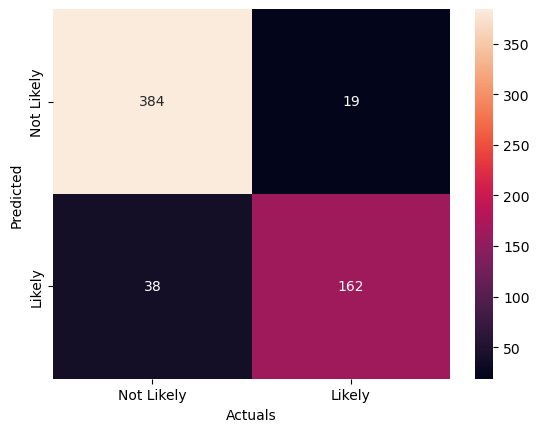

In [183]:
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Likely','Likely'], yticklabels=['Not Likely','Likely'])
plt.xlabel("Actuals")
plt.ylabel("Predicted")

In [186]:
# Visualize the decision tree structure
from sklearn.tree import export_text

print(export_text(model, feature_names=list(X.columns)))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- size <= 1.50
|   |   |   |--- age_months <= 21.50
|   |   |   |   |--- class: 0
|   |   |   |--- age_months >  21.50
|   |   |   |   |--- class: 0
|   |   |--- size >  1.50
|   |   |   |--- size <= 2.50
|   |   |   |   |--- age_months <= 23.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age_months >  23.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- size >  2.50
|   |   |   |   |--- adoption_fee <= -0.49
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- adoption_fee >  -0.49
|   |   |   |   |   |--- class: 0
|   |--- age_months >  34.50
|   |   |--- pet_type_Dog <= 0.50
|   |   |   |--- color_Brown <= 0.50
|   |   |   |   |--- weight_kg <= 0.39
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- weight_kg >  0.39
|   |   |   |   |   |--- class: 0
|   |   |   |--- color_Brown >  0.50
|   |   |   |   |--- class: 0
|   |   |--- pet_type_Dog >  0.50
|   |   |   |--- size <= 2.50
|   |   |   |   |---

### Conclusion

**Decision Tree Classifier (Default Parameters):**
- Accuracy: 0.87
- Provides a good baseline with balanced precision and recall for both classes.

**Custom Decision Tree Classifier (Specified Hyperparameters):**
- Accuracy: 0.91
- Improved performance with better precision, recall, and F1-score for the 'Likely' adoption class.

Tuning hyperparameters significantly enhances the model's predictive power, 
demonstrating the value of adjusting parameters to capture complex patterns in the data. 

The decision tree model, especially with fine-tuning, proves to be effective for predicting pet adoption likelihood.